In [9]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

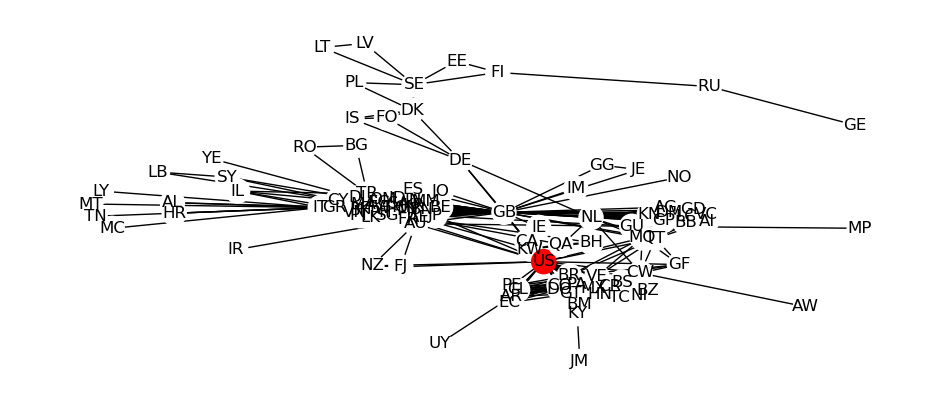

In [10]:
def plot_net (graph):
    color_map = []
    for node in graph:
        if node == 'US':
            color_map.append('red')
        else: 
            color_map.append('white')      
            
    fig, ax = plt.subplots(1, 1, figsize=(12, 5));
    nx.draw(graph, node_color=color_map, with_labels=True)
    plt.show()
    

G = nx.read_gpickle('data/graphs/2001.pickle')
plot_net(G)